#### [Naver 리뷰 데이터셋 전처리] <hr>
- homepage : https://github.com/e9t/nsmc
- train : https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
- test : https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

[1] 데이터 준비 <hr>

In [55]:
# 데이터 다운로드
# from urllib.request import urlretrieve

# file_name = '../DATA/ratings_test.txt' # 파일 경로 / 파일명 지정.
# test_url = 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt'
# ret = urlretrieve(test_url, file_name)
# ret

('../DATA/ratings_test.txt', <http.client.HTTPMessage at 0x205eb565220>)

![화면 캡처 2024-03-29 105409.png](<attachment:화면 캡처 2024-03-29 105409.png>)
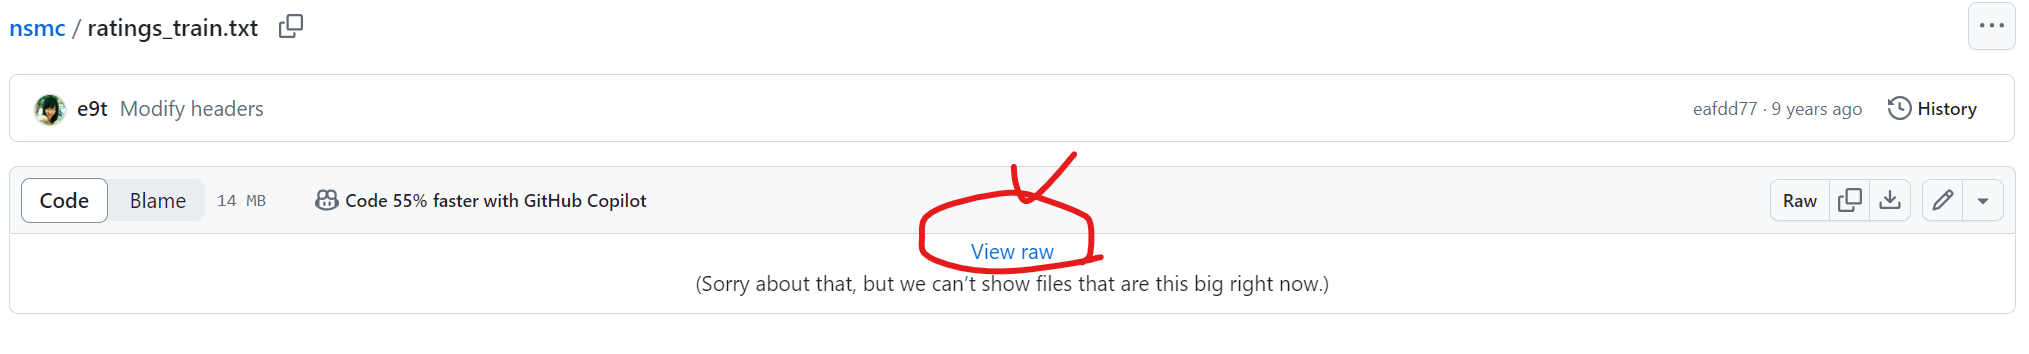

In [1]:
import pandas as pd
file_name = '../DATA/ratings_test.txt'
testDF = pd.read_table(file_name)

[2] 데이터 전처리 <hr>
- 결측치, 중복 데이터
- 클래스 균형 데이터 여부 확인
- 텍스트 데이터 전처리 => 정제(불용어, 노이즈 데이터 제거) ▶ 토큰화 ▶ 정제 => 단어 사전 생성
- 텍스트 데이터 인코딩
- 텍스트 데이터 패딩 ( 길이가 다 다를 것이기 때문에 )

[2-1] 기본 전처리 : 결측치, 중복 데이터, 클래스 비율 체크, 피처와 타겟 분리

In [2]:
# 불필요한 컬럼 삭제
testDF.drop('id', axis='columns', inplace=True)

In [3]:
# 결측치 처리
print(f'결측치 확인 :\n{testDF.isna().sum()}\n')
testDF.dropna(inplace=True)

print(f'testDF = {testDF.shape}')

결측치 확인 :
document    3
label       0
dtype: int64

testDF = (49997, 2)


In [4]:
# 중복데이터 확인
print(f'중복데이터 확인 :\n{testDF.duplicated().sum()}\n')

# 중복데이터 제거
testDF = testDF.drop_duplicates()

중복데이터 확인 :
793



In [5]:
# 클래스 비율 확인
print(f'클래스 비율 확인 :\n{testDF["label"].value_counts()}')

클래스 비율 확인 :
label
1    24734
0    24470
Name: count, dtype: int64


In [6]:
testDF.head()

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [7]:
# 피처와 레이블 분리
print(f'columns => {testDF.columns}')
documentDF = testDF.document.to_frame()
labelSR = testDF.label

print(f'documentDF => {documentDF.shape}, labelSR => {labelSR.shape}')

columns => Index(['document', 'label'], dtype='object')
documentDF => (49204, 1), labelSR => (49204,)


[2-2] 텍스트 데이터 전처리 : 정제 (노이즈데이터, 불용어 제거, 토큰화, 정수화)
- 노이즈 데이터 기준 : 한글 Only or 한글 + 영어 or 한글 + 영어 + 숫자 
- 본인이 결정해야 함.

In [8]:
# 파이썬 string 모듈에서 제공하는 구두점
# import string

# stop_word = string.punctuation

In [9]:
# 한글과 공백을 제외하고 모두 제거
# regex = True ===> 정규식 적용
hangul_pattern = "[^ㄱ-ㅎㅏ-ㅣ가-힣]" # 한글 Only
documentDF['document'] = documentDF['document'].str.replace(hangul_pattern, ' ', regex = True)
documentDF.head()

,document
0,굳 ㅋ
1,
2,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아
3,지루하지는 않은데 완전 막장임 돈주고 보기에는
4,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠


In [10]:
documentDF.isnull().sum()

document    0
dtype: int64

In [165]:
# 1개 이상의 공백을 ''로 바꿔준다.
documentDF['document'] = documentDF['document'].str.replace('^ +', '', regex = True)
#documentDF['document'] = documentDF['document'].replace('', np.nan, inplace=True)

document    0
dtype: int64

In [166]:
# from urllib.request import urlretrieve

# filename = '../DATA/stop_word1.txt'
# url = 'https://gist.githubusercontent.com/chulgil/d10b18575a73778da4bc83853385465c/raw/a1a451421097fa9a93179cb1f1f0dc392f1f9da9/stopwords.txt'

# ret = urlretrieve(url, filename = filename)

In [167]:
stop_words_list = []
f = open('../DATA/hangul_stopword.txt', 'r')
stop_words_list = f.read().split('\n')
stop_words_list

['가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',


In [168]:
len(stop_words_list)

1278

In [172]:
def remove_stopwords(text, stop_words_list):
    tokens = text.split(' ')
    meaningful_words = [w for w in tokens if not w in stop_words_list]
    return ' '.join(meaningful_words)

In [173]:
documentDF.iloc[0]

document    굳 ㅋ
Name: 0, dtype: object

In [174]:
remove_stopwords('잔다 겨우 잔다', stop_words_list)

'잔다 잔다'

In [175]:
documentDF['document'] = documentDF['document'].apply(lambda x : remove_stopwords(x, stop_words_list))

In [176]:
documentDF.head()

,document
0,굳 ㅋ
1,
2,뭐야 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아
3,지루하지는 않은데 완전 막장임 돈주고 보기에는
4,만 아니었어도 별 개 줬을텐데 나와서 심기를 불편하게 하죠


[2-3] 토큰화

In [177]:
from konlpy.tag import Okt

okt = Okt()

In [178]:
vocab={}
for idx in range(documentDF.shape[0]): 
    result = okt.morphs(documentDF.iloc[idx][0])  
    for word in result:
        if len(word) >= 2: 
            if vocab.get(word):
                vocab[word] += 1
            else :
                vocab[word] = 1

In [179]:
sorted(vocab, key = lambda x : x[1], reverse = True)

['힛힛',
 '이힛',
 '막힙니다',
 '잡힘',
 '막힘',
 '막힘이',
 '넓힘으로',
 '밝힘',
 '막힐',
 '먹힐',
 '꼽힐듯',
 '꼽힐',
 '잡힐수가',
 '박힐',
 '꼽힐만',
 '뽑힐',
 '킬힐',
 '묻힐',
 '밝힐',
 '잡힐거야',
 '잡힐듯',
 '먹힐듯',
 '팀힐',
 '캐힐',
 '묻힐만큼',
 '잡힐거',
 '꽂힌',
 '갇힌',
 '갖힌',
 '먹힌',
 '꽂힌다',
 '박힌것',
 '묻힌것을',
 '박힌다',
 '박힌',
 '먹힌듯',
 '묻힌',
 '막힌',
 '먹힌건',
 '섥힌',
 '잡힌다는',
 '갇힌듯',
 '막힌다',
 '입힌',
 '입힌다면',
 '꽃힌다',
 '꼽힌다',
 '갇힌거만',
 '잡힌듯',
 '위힌',
 '맺힌다',
 '밖힌',
 '찍힌',
 '잡힌',
 '먹힌다',
 '막힌듯',
 '높힌',
 '괜히',
 '뻔히',
 '특히',
 '잡히던',
 '감히',
 '찍히',
 '딱히',
 '꼽히는',
 '히히힛',
 '극히',
 '묻히기',
 '걷히지',
 '막히게',
 '연히',
 '흔히',
 '심히',
 '묻히',
 '우히히히',
 '먹히니까',
 '필히',
 '밝히지도',
 '편히',
 '높히는게',
 '모히칸',
 '분히',
 '잊히지',
 '먹히고',
 '원히트원더',
 '익히',
 '붉히곤',
 '빤히',
 '히히힛히힛',
 '히히히',
 '밝히는거',
 '밝히지마라',
 '굳히기',
 '친히',
 '가히',
 '긋히',
 '얽히는',
 '푸히히',
 '흔히말하는',
 '꼽히게',
 '묻히긴',
 '밟히며',
 '막히다',
 '원히라',
 '썩히다니',
 '출히는',
 '박히면서',
 '얽히고',
 '치히로',
 '져히',
 '모히토',
 '잡히면',
 '입히고',
 '밝히고',
 '넓히시던가',
 '박히는',
 '오히려',
 '막히군',
 '밣히는',
 '밝히는',
 '박히네요',
 '막히는',
 '잊히지가',
 '뽑히겠습니까',
 '잡히던지',
 '먹히려면',
 '꽂히는',


In [180]:
vocab.get('평점')

2217

In [181]:
len(vocab)

51869

In [182]:
vocabDF = pd.DataFrame(vocab.values(), index = vocab.keys())
vocabDF

,0
평점,2217
나쁘진,12
않지만,47
더욱,94
아니잖아,27
...,...
박약,1
닮았고,1
이등병,1
높았지만,1


In [183]:
vocabDF.sort_values(by = 0, ascending = False, inplace = True)
vocabDF

,0
영화,17290
너무,3727
정말,3242
진짜,2899
으로,2544
...,...
이퀼리브리엄,1
마땅하지만,1
기대했길래,1
개뉴잼,1


In [184]:
(vocabDF > 10).sum()

0    4730
dtype: int64

[3] 데이터셋용 단어사전/어휘사전
- 최종 사용할 단어 수
- 특별한 의미의 문자 추가 : 'UNK', 'PAD'

In [185]:
VOCAB_DICT = {0 : '<UNK>', 1 : '<PAD>'}

for idx in range(10):
    print(vocabDF.index[idx])
    VOCAB_DICT[idx+2] = vocabDF.index[idx]

영화
너무
정말
진짜
으로
평점
연기
에서
최고
생각


In [186]:
# 수치값을 문자열로 변환 (디코딩)
test = ['영화', '최고', '생각']

encoding = []
sentence = []
for tt in test:
    sentence.append(0)
    for k, v in VOCAB_DICT.items():
        if v == tt:
            sentence[-1] = k
            break
print(sentence)

[2, 10, 11]


In [187]:
# 수치값을 문자열로 변환 (디코딩)
encoding = []
words = []
for tt in sentence:
   words.append(VOCAB_DICT.get(tt))

print(words)

['영화', '최고', '생각']


In [189]:
okt.morphs('오늘은 좋은 날')

['오늘', '은', '좋은', '날']